# Analyzing Ford GoBike System Data
## by Jaslin Kaur Sandhu

## Introduction

Ford's GoBike was launched across the San Franciso Bay Area and is available to all residents using either physical Bay Area transit Clipper cards or the Ford GoBike app. Begining in August 2013, Bay Wheels system had over 2600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

The Bay Wheels fleet consists of two kinds of bicycles: a "Classic" docked model with a step through frame and a hybrid which is an electrical-assist model that can be parked at a dock or used in a dockless manner. 
These bicycles are readily available 24 hours a day, 365 days a year and customers can choose from a single ride or to subscribe to an annual membership.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import datetime

%matplotlib inline

In [2]:
#Load Dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv');
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#To check if there are any null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Cleaning Data

In [4]:
#Remove rows have null values
df_clean = df.dropna()
df_clean.isnull().sum()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [5]:
#The number of users based on gender
df_clean['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [6]:
#The number of users types
df_clean['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [7]:
#To check for any duplicated values
df_clean.duplicated().sum()

0

In [8]:
#Change Start Time & End Time data format to datetime as this is an accurate datetime
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)
df_clean.head()

C:\Users\jaslinkaur.sandhu\AppData\Local\Continuum\anaconda3\envs\Solution_1\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [9]:
#Extracting hours from start time 
df_clean['start_hour'] = df_clean['start_time'].dt.hour

#Extracting start day from start time
df_clean['start_day'] = df_clean['start_time'].dt.strftime('%a')

<ipython-input-9-e91211d125cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['start_hour'] = df_clean['start_time'].dt.hour
<ipython-input-9-e91211d125cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['start_day'] = df_clean['start_time'].dt.strftime('%a')


In [10]:
df_clean['start_day'].value_counts()

Thu    33712
Tue    30584
Wed    28426
Fri    27663
Mon    25641
Sun    14512
Sat    14414
Name: start_day, dtype: int64

In [11]:
#Converting the day of the week to a category
weekdays = ['Mon' , 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_clean['start_day'] = df_clean['start_day'].astype(ordered_weekdays)

<ipython-input-11-d5abc72f19ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['start_day'] = df_clean['start_day'].astype(ordered_weekdays)


In [12]:
#Covert Duration to Minutes as it is easier to count in minutes
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

<ipython-input-12-d22a6259e59b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['duration_min'] = df_clean['duration_sec']/60


In [13]:
#Creating an age data 
df_clean['age'] = 2021 - df['member_birth_year']
df_clean.head()

<ipython-input-13-3ddef1b2665b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['age'] = 2021 - df['member_birth_year']


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_day,duration_min,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17,Thu,869.750000,37.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12,Thu,1030.900000,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17,Thu,608.166667,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,23,Thu,26.416667,47.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,23,Thu,29.883333,62.0


In [14]:
#Convert float values into INT as for age and birth year it should be int values.
df_clean['age'] = df_clean['age'].astype(int)
df_clean['duration_min'] = df_clean['duration_min'].astype(int)
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

<ipython-input-14-35666410cd47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['age'] = df_clean['age'].astype(int)
<ipython-input-14-35666410cd47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['duration_min'] = df_clean['duration_min'].astype(int)
<ipython-input-14-35666410cd47>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [15]:
#Understanding the duration in mins data 
df_clean['duration_min'].describe()

count    174952.000000
mean         11.241461
std          27.371269
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

The max value is 1424 which indicates that the data is not normally distributed
Calculate the Interquartile Range : 

Q3 - Q1 = 7.85

Upper Bound = (1.5 * 7.85) + 13.27 = 25.05

In [16]:
#Understanding the age data and looking for outliers
df_clean['age'].describe()

count    174952.000000
mean         36.196865
std          10.118731
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: age, dtype: float64

Based on the describe we can see that the max age is 143, which is pretty unsual. So we will calculate the Interquartile Range.
Q3 - Q1 : 12 

Upper Bound = (1.5 * 12) + 41 = 59

In [17]:
#Hence, since the upper bound is at 60, we will look at ages 60 and below.
df_clean = df_clean[df_clean['age'] <= 60]

In [18]:
# save cleaned data to an updated CSV
df_clean.to_csv('clean_data.csv', index=False)

### What is the structure of your dataset?

This dataset consists of Ford GoBike rides that took place in the San Franciso Bay Area. The dataset contains detailed features about : 

<ul>
    <li>Duration : Duration of the bike was booked in seconds.</li>
    <li>Start Time & End Time : Consists of date and time the user has booked the bike for.</li>
    <li>Stations : The start and the end of where the rider books the bikes.</li>
    <li>Customer Data : Data such as gender,birth date and the type of user.</li>
</ul>

This dataset was further enhanced and values such as age of the user and day of the week the user use the bike is derived from the given data.

### What is/are the main feature(s) of interest in your dataset?

The are two features of interest in the Ford GoBike dataset is the duration of biking in relation to day of the week and time of the day and the age of the user and the biking time.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Features that would help me support my dataset : 
<ul>
    <li>Duration of the biking</li>
    <li>member_birth_year - To derive the age and investigate the relationship between age and biking durations.</li>
    <li>start_time - To investigate when are the bikes usually used.</li>
    <li>member_gender - To investigate the gender's of the people that use the bikes most frequently.</li>
</ul>

## Univariate Exploration

In [19]:
#Setting the default color palette
default_color = sb.color_palette()[0]

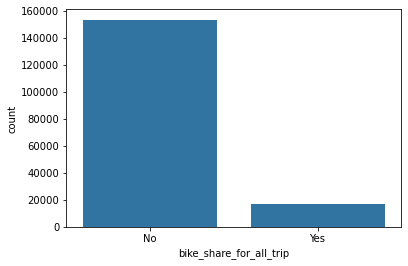

In [20]:
#Plot for Bike Share
sb.countplot(data=df_clean, x='bike_share_for_all_trip', color = default_color);

**Observation** : From the chart, we can see that most of the users do not use bike share for the whole trip.

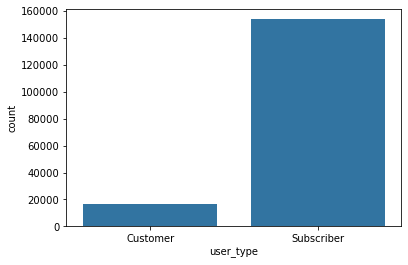

In [21]:
#Plot for User Type Usage
sb.countplot(data = df_clean , x='user_type', color = default_color);

**Observation** : From the chart, we can see that most of the users are subsribers as compared to customers.

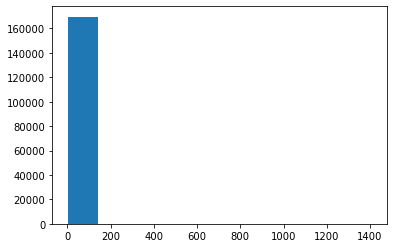

In [22]:
#Plot for duration in Mins for the bike share usage.
plt.hist(data=df_clean,x='duration_min');

In [23]:
#The distribution is not normally distributed
df_clean = df_clean[df_clean['duration_min'] <= 100]

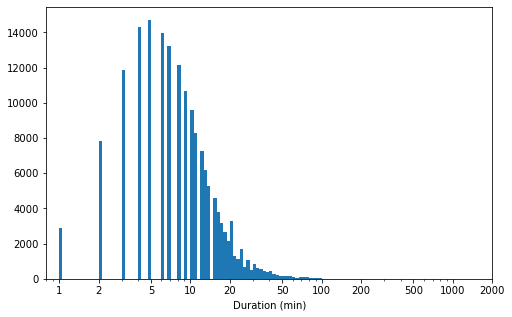

In [24]:
#Since there it is not distributed normally. We will include a log scale 
log_binsize = 0.025

#Log Scale
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max()) + log_binsize , log_binsize)

#Plotting the graph for Duration in Mins for log scale 
plt.figure(figsize=[8,5])
plt.hist(data = df_clean, x='duration_min', bins = bins)
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
plt.xlabel('Duration (min)');

**Observation** : From the plot we can see that most of the data is below 40 mins. To get a more accurate plot, we will look at the distribution now.

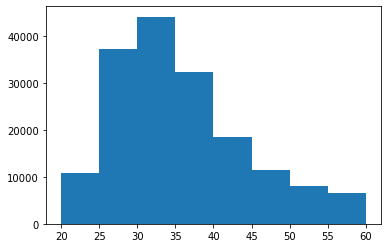

In [25]:
#Plot a histogram with data of users with ages below 60
binsize = 5 
bins = np.arange(20, df_clean['age'].max()+binsize, binsize)
plt.hist(data = df_clean, x= 'age', bins = bins);

**Observation** :Based on the histogram, we can observe that most of the bikers at approximately at the age of 25 to 40.

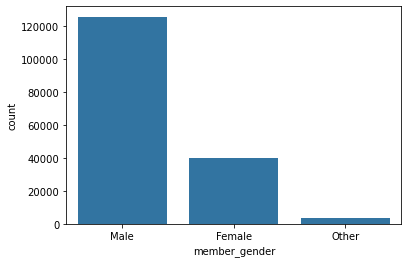

In [26]:
#Plot to describe the distribution of genders 
sb.countplot(data = df_clean , x='member_gender',color=default_color);

**Observation** : There are more male bikers as compared to female bikers as well as other gender identified bikers.

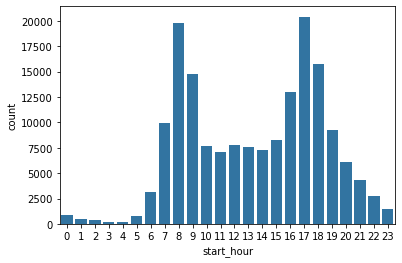

In [27]:
#Plot to describe the starting hour during the day of the bikers
sb.countplot(data = df_clean, x = 'start_hour', color = default_color);

**Observation** : 8 AM & 5PM are the peak usage hours 

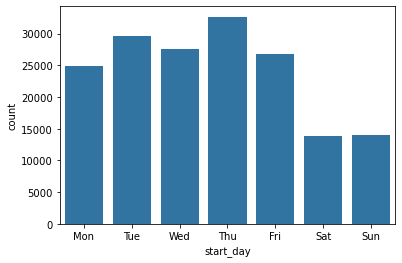

In [28]:
#To identify the Day's of the week the bikes are mainly used
sb.countplot(data = df_clean, x = 'start_day', color = default_color);

**Observation** : Weekdays have more bikers than the weekend and Thursday has the highest number of bikers on a weekday.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> <ol>
    <li>The unsual points faced was that the max age was 141. Hence this was adjusted and the dataset of 60 years and below was taken</li>
    <li>The duration was not normally distributed. Hence, a log scale was used to scale the dataset to ensure is it more realistic.</li>
</ol>

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> <ol>
    <li>An Interquartile range was calculated on the age and the the datset of user types of 60 and below was analysed based on that.</li>
    <li>A log scale was used to scale the dataset to ensure is it more realistic.</li>
</ol>


## Bivariate Exploration

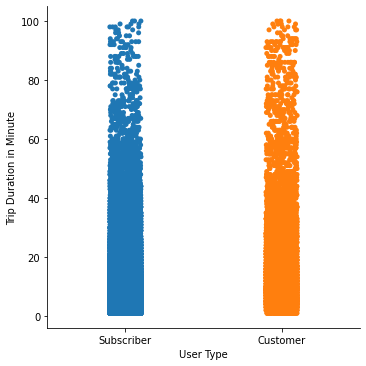

In [29]:
# Plot to understand the User Type vs the Duration in min for rental
sb.catplot(data= df_clean, x="user_type", y="duration_min", order=["Subscriber", "Customer"]);
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

**Observation** : Based on the catplot, we can observe that the customers have varied duration of rentals and rented the bikes for longer period of times whereas for subsribers, they have rented the bikes for shorter period of time more targetted for specific usage.

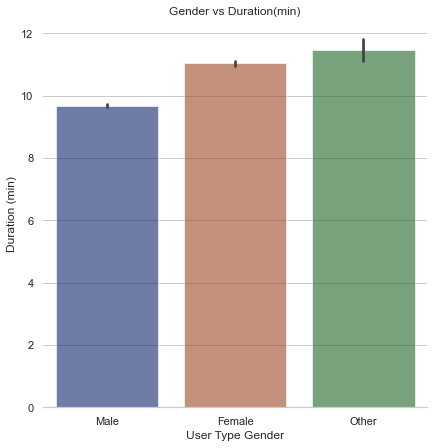

In [30]:
#Plot for Gender of users versus the duration for rental of the bikes
sb.set_theme(style="whitegrid");
g = sb.catplot(data=df_clean, kind="bar",x="member_gender", y="duration_min", palette="dark", alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels("User Type Gender", "Duration (min)");
g.ax.set_title("Gender vs Duration(min)");

**Observation** : The difference of male riders and female riders are very minimal. But the slight difference indicates that males rent the bikes for shorter period at a time. In addition to that, Other genders are observed to use the bike sharing system for a slighly longer period of time as compared to Female and Male.

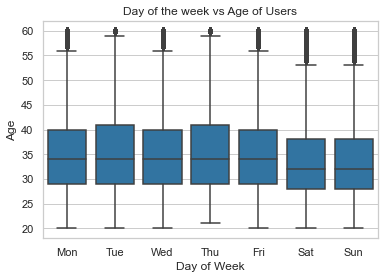

In [31]:
# Plot to identify the Start Day and the age of the users
sb.boxplot(data=df_clean, x='start_day', y='age', color=default_color);
plt.xlabel('Day of Week');
plt.ylabel('Age');
plt.title('Day of the week vs Age of Users');

**Observation** : The riders that rented the bikes on weekdays (Monday - Friday) are slighty older than those that rented on the weekends. Hence, what can be observed is that on weekdays it is mainly used for work commute.

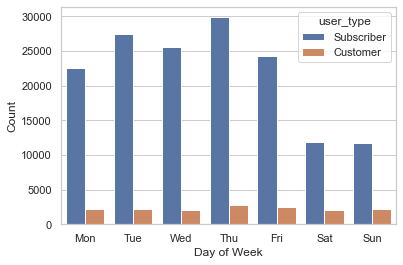

In [32]:
#Plot to identify the Start Day of the Week versus the User Type for the rental bikes
sb.countplot(data=df_clean, x='start_day', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');

**Observation** : Based on the countplot, there are much more Subscribers as compared to Customers in general. In addition to that, there is a big drop on the weekend usage which can suggest that subsribers mainly use the bikes for work usage on weekdays.

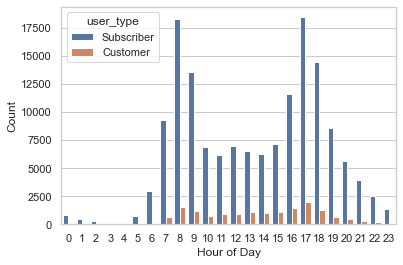

In [33]:
#Plot to identify the Start hour of the day and user type for bike rental usage
sb.countplot(data=df_clean, x='start_hour', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

**Observation** : The subsribers usage usually tend to peak during working hours and rush hour. For instance, at 8 AM and at 5 PM. Whereas a pattern was observed for the customers who tend to ride most in the afternoon or earlu evening.

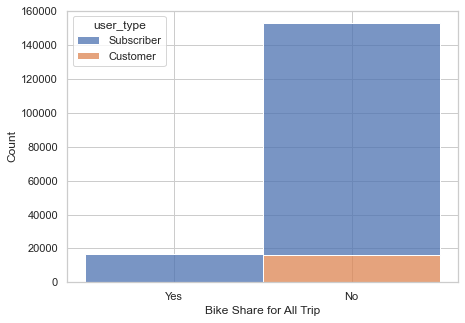

In [34]:
#Plot to identify the difference between customers and subsribers for bike share for the whole trip
f, ax = plt.subplots(figsize=(7, 5))
sb.histplot(data=df_clean, x="bike_share_for_all_trip", hue="user_type", multiple="stack");
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

**Observation** : Based on the stacked hist plot, we can observe that the Subsriber is the only user type to use bike share for their whole trip. In addition to that, there are also Customer & Subsriber user type that did not use the bike share for the whole trip. This can indicate that most probably the user had to walk through the process or use any other modes of transport to get to their destination. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> One of the main relationships that was observed is that, there are alot more subsriberes as compared to Customers. Subsribers tend to use the rental bikes more for work commute as it is highly used during office hours and weekdays. Whereas for Customers the highest usage period is in the afternoon at 12 pm to 4 pm and mainly on weekends.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It is interesting to see that males generally rent the bikes for a shorter period of time. This is a rather interesting feature and if we had more data related to gender based pattern we could come up with an interesting deduction.
> It is also interesting that not all the users use the bike sharing for their whole trip to get to their destination.

## Multivariate Exploration

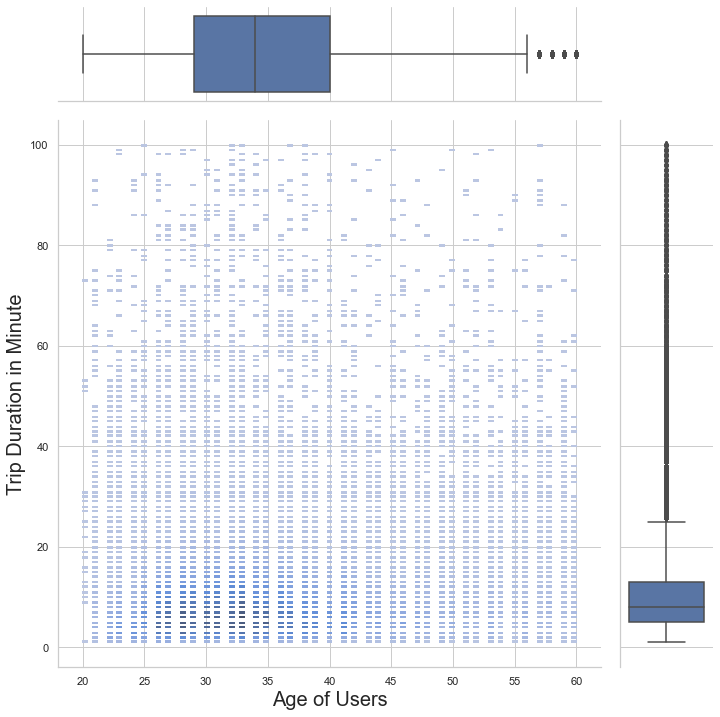

In [35]:
#sb.pointplot(data=df_clean, x='start_time_day_ofthe_week', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
#plt.xlabel('Day of Week');
#plt.ylabel('Avg. Trip Duration in Minute');
g = sb.JointGrid(data=df_clean, x="age", y="duration_min", height=10);
g.plot_joint(sb.histplot);
g.plot_marginals(sb.boxplot);
g.ax_joint.set_xlabel('Age of Users', fontsize=20);
g.ax_joint.set_ylabel('Trip Duration in Minute', fontsize=20);


**Observation** :  Based on the jointplot, we can observe that the users are mainly from ages 25 to 40. In addition to that, as well the average trip duration in minutes by users are approximately within 20 mins. Hence, we can deduce that the bikes might be mainly used by working adults for short period usage. Although, we can observe that there are users up to the age of 60 and there are users who use the bike rentals up to a 100 minutes at a period.

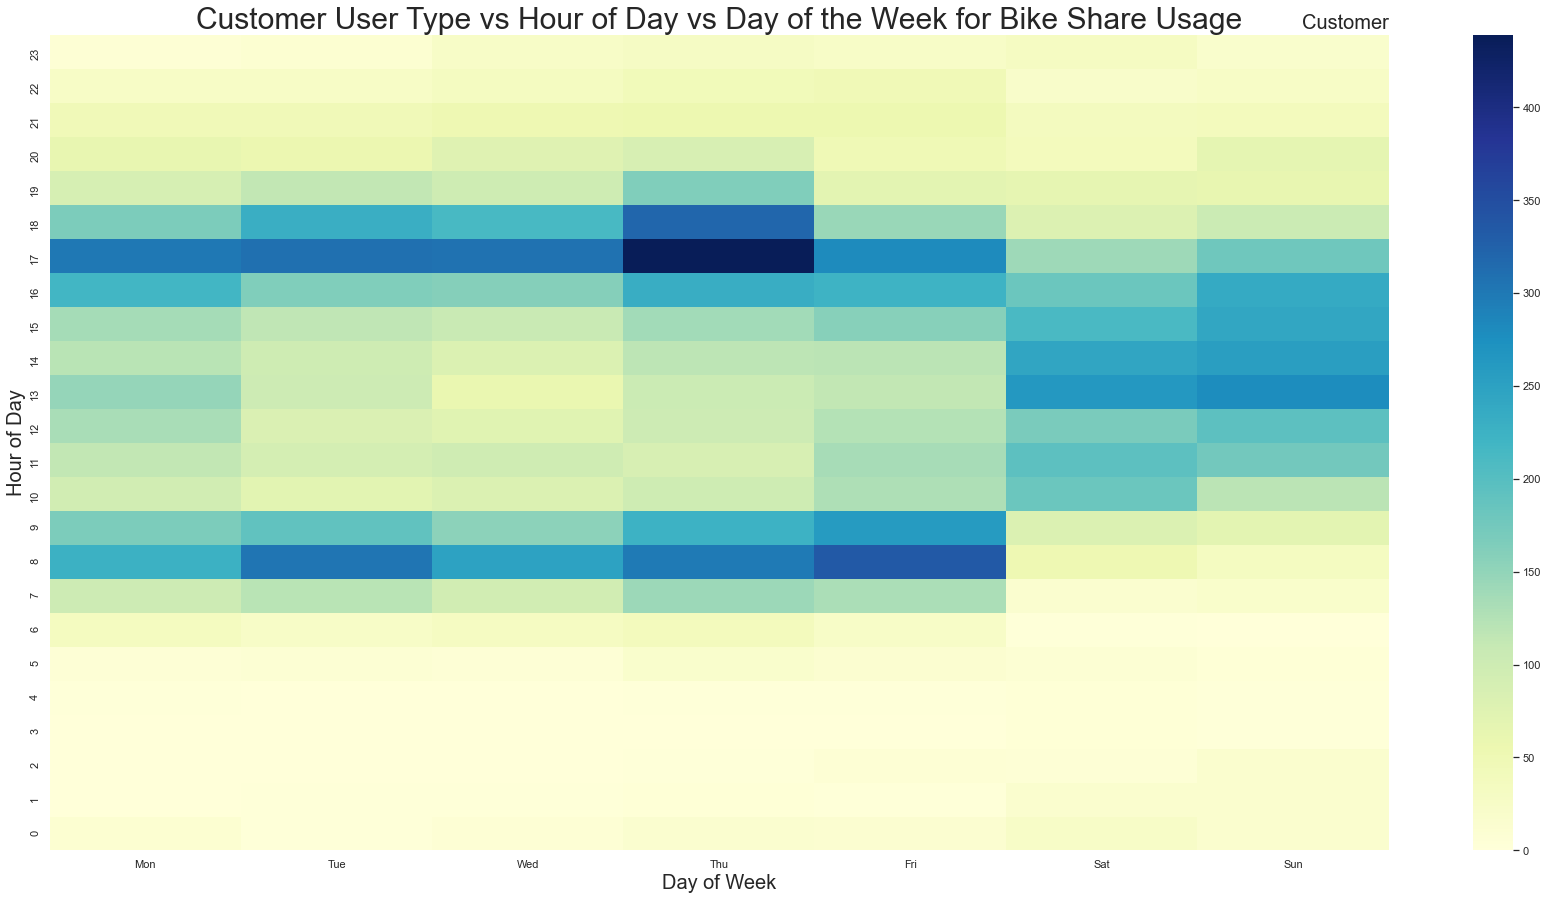

In [36]:
fig, ax = plt.subplots(figsize=(30,15))

#Query for Customer Related Data against the bike id 
customers = df_clean.query('user_type == "Customer"').groupby(['start_hour', 'start_day'])["bike_id"].size().reset_index()
customers = customers.pivot('start_hour', 'start_day', 'bike_id')

#Plotting Heatmap
sb.heatmap(customers,  cmap="YlGnBu");

#To ensure the hours start at 0 to 24
ax.invert_yaxis()

#Graph labels
plt.title('Customer', loc='right', fontsize=20);
plt.xlabel('Day of Week', fontsize=20);
plt.ylabel('Hour of Day', fontsize=20);
plt.title('Customer User Type vs Hour of Day vs Day of the Week for Bike Share Usage',  fontsize=30);

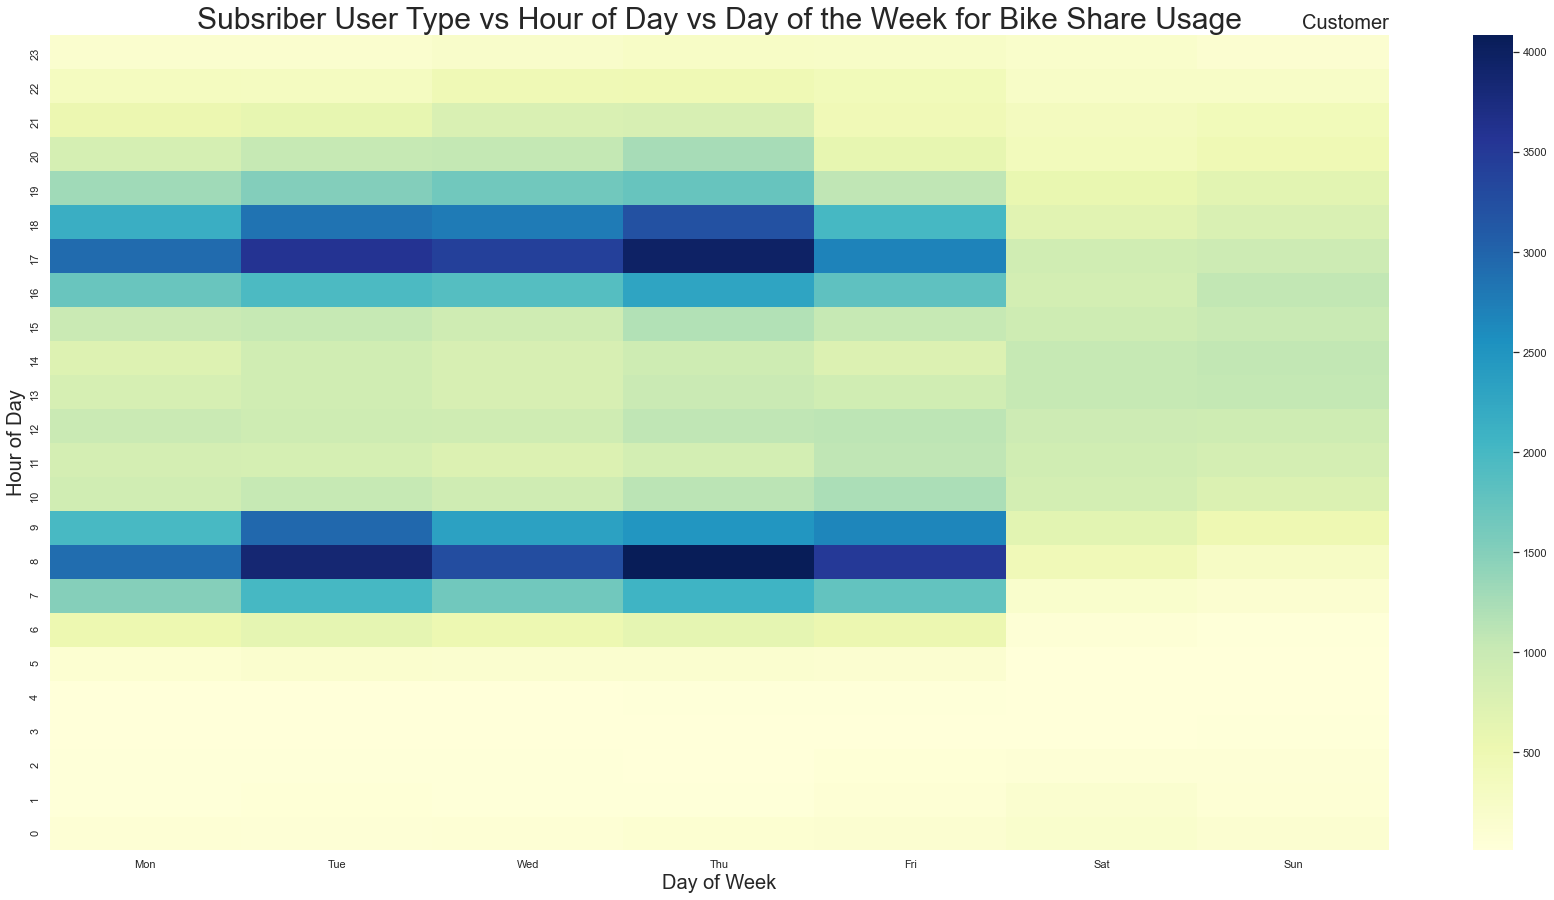

In [37]:
fig, ax = plt.subplots(figsize=(30,15))

#Query for Subsriber Related Data
subscribers = df_clean.query('user_type == "Subscriber"').groupby(['start_hour', 'start_day'])["bike_id"].size().reset_index()
subscribers = subscribers.pivot('start_hour', 'start_day', "bike_id")

#Plotting Heatmap
sb.heatmap(subscribers,  cmap="YlGnBu");

#To ensure the hours start at 0 to 24
ax.invert_yaxis()

#Graph labels
plt.title('Customer', loc='right', fontsize=20);
plt.xlabel('Day of Week', fontsize=20);
plt.ylabel('Hour of Day', fontsize=20);
plt.title('Subsriber User Type vs Hour of Day vs Day of the Week for Bike Share Usage',  fontsize=30);

**Observation** : The heatmaps show evidently two very different usage of the bikes by Customers and Subscribers. For instance, Subsribers tend to use the bikes mainly on weekdays (Monday through Friday) whereas Customers tend to use the bikes more on weekends and particularly in the afternoon period from 12pm to 4 pm. 

C:\Users\jaslinkaur.sandhu\AppData\Local\Continuum\anaconda3\envs\Solution_1\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\jaslinkaur.sandhu\AppData\Local\Continuum\anaconda3\envs\Solution_1\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the stripplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


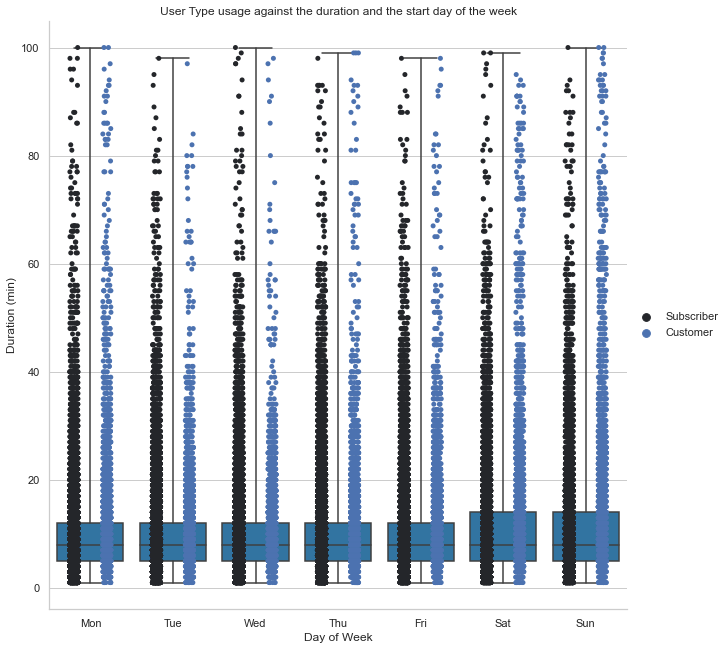

In [38]:
g = sb.FacetGrid(data = df_clean, height = 9)
g.map(sb.stripplot, "start_day", "duration_min", "user_type", dodge = True);
ax = sb.boxplot(x="start_day", y="duration_min", data=df_clean, whis=np.inf, color=default_color)
g.add_legend()
plt.title("User Type usage against the duration and the start day of the week")
plt.xlabel("Day of Week");
plt.ylabel("Duration (min)");

**Observation** : The plot evidently shows that customers and subsribers tend to use the bike sharing system for longer durations on weekends as compared to weekdays. Based on the plot, it is proofs that susbribers use the bike sharing system for shorter periods at at time as compared to Customers on weekdays. In conclusion, Customers tend to use the bike sharing system more on weekends and for longer period of time whereas for Subscribers they tend to use the bikes on weekdays for a shorter period of time.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploratory analysis strengthened the patterns discovered in the bivariate analysis and as well as the univaritate. The relationship that was observed with the User Types, ie. Customers and Subscribers is that mainly Subsribers use the rental bikes on workdays and have high usage during rush hours from 8 am to 9 am and 5 pm to 6 pm which are essentially before the workday begins and after the workday ends. In contradiction to that, occasional customers tend to rent the bikes on the weekend from 1 pm to 4 pm which shows that they might be using the bikes for leisure purposes. 

### Were there any interesting or surprising interactions between features?

> There were no suprising element interactions between the features as they complimented each other pretty well and when looking at all the features combined it makes sense and we are able to anlyse the relationship between the data. In addition to that, with more data gathered that could be gender targeted we could deduce gender specific conclusions and behavioural habits on renting the Ford GoBikes.